In [2]:
"""
Created on Sat Oct 23 10:04:24 2021

Class: Modellbildung und Simulation
Unit: K2 A5 (Weiterarbeit)

@author: vazquez
"""

import matplotlib.pyplot as plt
import numpy as np
from numpy import pi as pi
from scipy.integrate import solve_ivp


#Variablen der DGL:
g = 9.81    #Erdbeschleunigung
l = 1.0     #Laenge des Zeiles
d = 0.3     #Daempfung
m = 1       #Masse
t_max=5;    #Maximale Zeit
t=np.linspace(0, t_max,101)


#Anfangsbedingungen:
phi_0 = pi/4
x0=[phi_0, 0] 

   
#DGSystem 1 Ordung, die zu loesen ist:
def xdot_fkt_lin(t, x, *args):      #STANDARD Form: (Zeit, Zustandsgroessen) 
    xdot= [x[1], -g/l*x[0] - d*x[1]]     #Zustandsgroessen: [x1=Winkelgeschw, x0=Winkel]
    return xdot

    
def xdot_fkt_nichtLin(t, x, *args):      #STANDARD Form: (Zeit, Zustandsgroessen) 
    xdot= [x[1], -g/l*np.sin(x[0]) - d*x[1]]     #Zustandsgroessen: [x1=Winkelgeschw, x0=Winkel]
    return xdot



#DGL wird geloest:
sol_lin = solve_ivp(xdot_fkt_lin, [0, t_max], x0, t_eval=t, method='LSODA', args=(g, l))
 #solve_ivp(Dif Funktion, [Zeitspanne] , Anf. Bed., Loes.Methode, Argumente)
sol_nichtLin = solve_ivp(xdot_fkt_nichtLin, [0, t_max], x0, t_eval=t, method='LSODA', args=(g, l))


#Zuweisung der Werte,die uns interesieren:  
t=sol_lin.t                      #Zeit

x_lin=sol_lin.y                   #Zuweisung der Zustandsgroessen
x_nichtLin=sol_nichtLin.y

phi_lin=x_lin[0]                  #Winkel linear
phi_dot_lin=x_lin[1]              #Winkelgeschwindigkeit nichtlinear

phi_nichtLin=x_nichtLin[0]        #Winkel nichtlinear
phi_dot_nichtLin=x_nichtLin[1]    #Winkelgeschwindigkeit nichtlinear


#Berechnung von Var fuer Ermittlung der pot und kin Energie:
#Hoehe h:
h = l*(1 - np.cos(phi_lin))       #Hoehe, Argument von cos wird in Rad eingegeben!!!
h_nichtLin =  l*(1 - np.cos(phi_nichtLin))

#Geschwindigkeit v:
v = phi_dot_lin * l               #Geschwindigkeit
v_nichtLin = phi_dot_nichtLin * l

#Energien:
wPot = m*g*h
wPot_nichtLin = m*g*h_nichtLin
wKin = 1/2*m*v**2
wKin_nichtLin = 1/2*m*v_nichtLin**2
wDiss = wPot[0] - (wPot+wKin)      #Anfangspotentielle Energie - pot und kin Energie
wDiss_nichtLin = wPot_nichtLin[0] - (wPot_nichtLin+wKin_nichtLin)

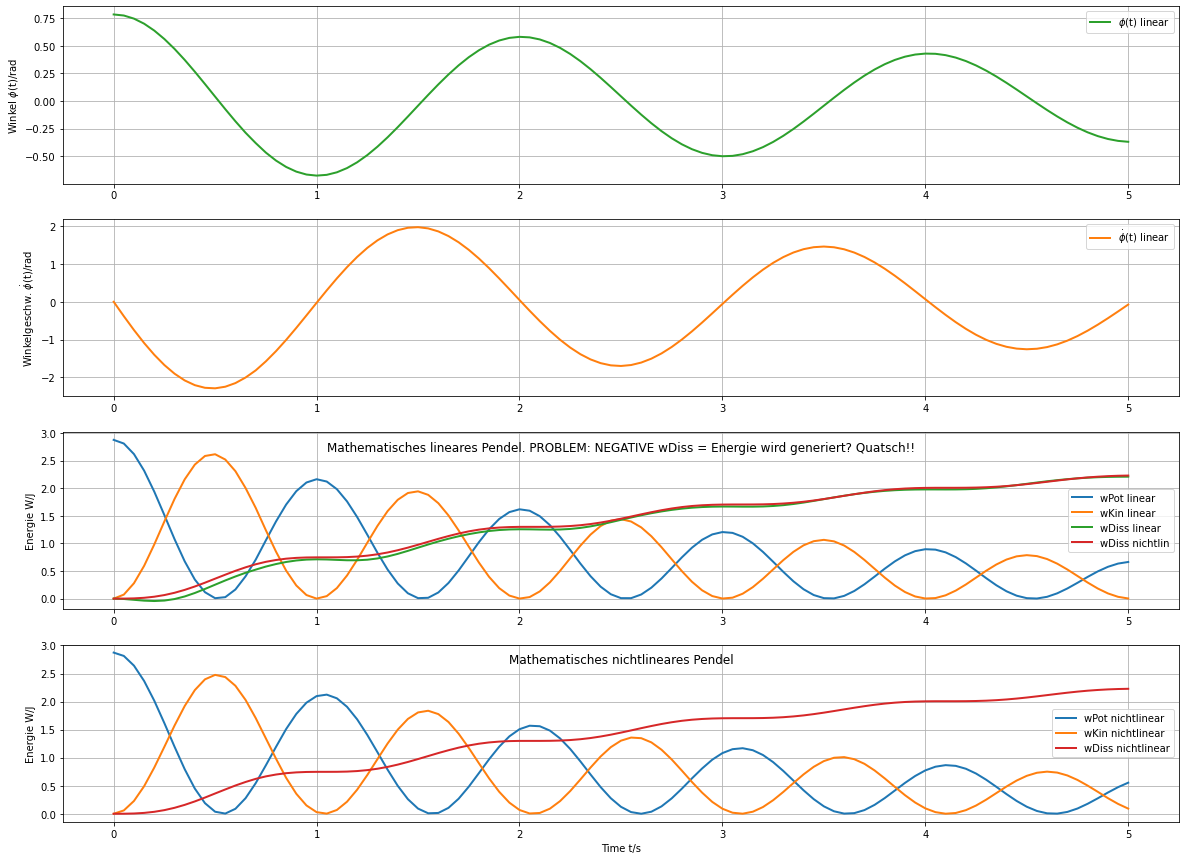

In [4]:
#PLOTTING:
#Winkel
fig = plt.figure(1, figsize=(20,15)); fig.clf()
ax1 = fig.add_subplot(411)
ax1.plot(t, phi_lin, label='$\phi$(t) linear', color='C2', linestyle='-', linewidth=2)
ax1.set_ylabel('Winkel $\phi$(t)/rad')
ax1.legend()                     #Erforderlich, so dass Legende angezeigt wird!
ax1.grid("True")

#Winkelgeschwindigkeit:
ax2 = fig.add_subplot(412)
ax2.plot(t, phi_dot_lin, label='$\dot{\phi}$(t) linear', color='C1', linestyle='-', linewidth=2)
ax2.set_ylabel('Winkelgeschw. $\dot{\phi}$(t)/rad')
ax2.legend()                     #Erforderlich, so dass Legende angezeigt wird!
ax2.grid("True")


#Energie_linear:
ax3 = fig.add_subplot(413)
ax3.plot(t, wPot, label='wPot linear', color='C0', linestyle='-', linewidth=2)
ax3.plot(t, wKin, label='wKin linear', color='C1', linestyle='-', linewidth=2)
ax3.plot(t, wDiss, label='wDiss linear', color='C2', linestyle='-', linewidth=2)
ax3.plot(t, wDiss_nichtLin, label='wDiss nichtlin', color='C3', linestyle='-', linewidth=2)
ax3.set_ylabel('Energie W/J')
ax3.set_title("Mathematisches lineares Pendel. PROBLEM: NEGATIVE wDiss = Energie wird generiert? Quatsch!!", y=1.0, pad=-19)
ax3.legend(loc = 'center right')                     #Erforderlich, so dass Legende angezeigt wird!
ax3.grid("True")


#Energie_nichtLinear:
ax4 = fig.add_subplot(414)
ax4.plot(t, wPot_nichtLin, label='wPot nichtlinear', color='C0', linestyle='-', linewidth=2)
ax4.plot(t, wKin_nichtLin, label='wKin nichtlinear', color='C1', linestyle='-', linewidth=2)
ax4.plot(t, wDiss_nichtLin, label='wDiss nichtlinear', color='C3', linestyle='-', linewidth=2)
ax4.set_ylabel('Energie W/J')
ax4.set_xlabel('Time t/s')
ax4.set_title("Mathematisches nichtlineares Pendel", y=1.0, pad=-19)
ax4.legend(loc = 'center right')                     #Erforderlich, so dass Legende angezeigt wird!
ax4.grid("True")